In [1]:
import numpy as np
import os
from utils import find_path_to_next_simulation
from MODSIM import initialize_dynamic_scene_with_random_tracks, perform_time_steps, create_and_place_simple_legacy_camera
from errorGenerator import ErrorGenerator
from datatypes.cameraRig import CameraRig
from datatypes.virtualCamera import VirtualCamera

from visualize import visualize_projections_json_mov, visualize_annotations_json, visualize_camera_pose_in_dsg_mov, visualize_dynamic_scene_mov, visualize_detections_json, visualize_detections_multiple_cameras, visualize_annotations_multiple_cameras, visualize_projections_multiple_cameras


In [2]:
WAVE_MOTION = True

In [3]:
# Camera types: 'STATIC_LEGACY', 'DYNAMIC'
STATIC_LEGACY = 'STATIC_LEGACY'
DYNAMIC_FRONT_MID = 'DYNAMIC_FRONT_MID'
DYNAMIC_FRONT_LEFT = 'DYNAMIC_FRONT_LEFT'
DYNAMIC_FRONT_RIGHT = 'DYNAMIC_FRONT_RIGHT'


MULTIPLE_CAMERAS = True
CAMERA_TYPES = [DYNAMIC_FRONT_LEFT, DYNAMIC_FRONT_MID, DYNAMIC_FRONT_RIGHT]
VESSEL_TO_PLACE_CAMERA_ON = 3

In [4]:
ERROR_CONFIG_PATH = 'detector_stats_config.yaml'
NUMBER_OF_VESSELS = 10
WRITE_TO_JSON = True
T_START = 0
T_END = 1000
VISUALIZE=True
MIN_NUM_VESSELS = 1
ANNOTATION_MODE = 2


In [5]:
# Find folder to save simultation trial to
simulation_folder = find_path_to_next_simulation()
simulation_folder

'./simulations/10/'

# Initialize MODSIM

In [6]:
# Dynamic scene
dsg = initialize_dynamic_scene_with_random_tracks(NUMBER_OF_VESSELS, writeToJson=WRITE_TO_JSON, path=simulation_folder)
vessels = dsg.get_vessels()

## Error generator
errorGenerator = ErrorGenerator(ERROR_CONFIG_PATH)


In [7]:
cameras = {}
for cameraID, cameraType in enumerate(CAMERA_TYPES):
    if cameraType == STATIC_LEGACY:
        ##### Static Camera #####
        # Create simple legacy camera and place it in the dynamic scene
        camera = create_and_place_simple_legacy_camera(dsg.get_larges_radius(), dsg.get_path_centre())

        ########################### OBS  ###################################################### 
        # If there is a static camera, there can only be one camera in the camera rig
        ####################################################################################### 
        cameras = {}
        cameras[0] = camera
        vessel = None
        break

    elif cameraType == DYNAMIC_FRONT_MID:
        ###### Dynamic Camera ######
        focal_length = 50*10**-3
        image_bounds = (3600, 2400) # Pixels (x,y)
        film_size = (36*10**-3, 24*10**-3)
        px = film_size[0]/image_bounds[0]
        py = film_size[1]/image_bounds[1]
        principal_point = (image_bounds[0]/2,image_bounds[1]/2)
        width_of_sensor = 36*10**-3 # Width of sensor
        roll_vcf = 0
        yaw_vcf = 0
        pitch_vcf = np.pi/200
        vessel = vessels[VESSEL_TO_PLACE_CAMERA_ON] # Must be the same for al cameras in the camera rig
        pos_vcf = np.array([vessel.get_length()/2, 0, vessel.get_air_draft()/2])

        camera = VirtualCamera(focal_length, px, py, principal_point, image_bounds)
        camera.place_camera_on_vessel(pos_vcf, roll_vcf, pitch_vcf, yaw_vcf)
    elif cameraType == DYNAMIC_FRONT_LEFT:
        ###### Dynamic Camera ######
        focal_length = 50*10**-3
        image_bounds = (3600, 2400) # Pixels (x,y)
        film_size = (36*10**-3, 24*10**-3)
        px = film_size[0]/image_bounds[0]
        py = film_size[1]/image_bounds[1]
        principal_point = (image_bounds[0]/2,image_bounds[1]/2)
        width_of_sensor = 36*10**-3 # Width of sensor
        roll_vcf = 0
        yaw_vcf = np.pi/8
        pitch_vcf = np.pi/200
        vessel = vessels[VESSEL_TO_PLACE_CAMERA_ON] # Must be the same for al cameras in the camera rig
        pos_vcf = np.array([vessel.get_length()/2, vessel.get_beam()/2, vessel.get_air_draft()/2])

        camera = VirtualCamera(focal_length, px, py, principal_point, image_bounds)
        camera.place_camera_on_vessel(pos_vcf, roll_vcf, pitch_vcf, yaw_vcf)
    elif cameraType == DYNAMIC_FRONT_RIGHT:
        ###### Dynamic Camera ######
        focal_length = 50*10**-3
        image_bounds = (3600, 2400) # Pixels (x,y)
        film_size = (36*10**-3, 24*10**-3)
        px = film_size[0]/image_bounds[0]
        py = film_size[1]/image_bounds[1]
        principal_point = (image_bounds[0]/2,image_bounds[1]/2)
        width_of_sensor = 36*10**-3 # Width of sensor
        roll_vcf = 0
        yaw_vcf = -np.pi/8
        pitch_vcf = np.pi/200
        vessel = vessels[VESSEL_TO_PLACE_CAMERA_ON] # Must be the same for al cameras in the camera rig
        pos_vcf = np.array([vessel.get_length()/2, -vessel.get_beam()/2, vessel.get_air_draft()/2])

        camera = VirtualCamera(focal_length, px, py, principal_point, image_bounds)
        camera.place_camera_on_vessel(pos_vcf, roll_vcf, pitch_vcf, yaw_vcf)
    # elif cameraType == OTHER TYPES:
    
    cameras[cameraID] = camera

camera_rig = CameraRig(cameras, vessel)


# Perform time steps

In [8]:
#pps, bbs, eBBs = perform_one_time_step_class(dsg, errorGenerator, camera_rig, 0, writeToJson=WRITE_TO_JSON, path=simulation_folder)

In [9]:
pps, bbs, eBBs = perform_time_steps(T_START, T_END, dsg, errorGenerator, camera_rig, annotation_mode=ANNOTATION_MODE, writeToJson=WRITE_TO_JSON, path=simulation_folder)

# Visualize

Loading projections from json
Visualizing projections
Moviepy - Building video ./simulations/10/projectedPoints_C0.mp4.
Moviepy - Writing video ./simulations/10/projectedPoints_C0.mp4



Moviepy - Done !
Moviepy - video ready ./simulations/10/projectedPoints_C0.mp4
Loading projections from json
Visualizing projections
Moviepy - Building video ./simulations/10/projectedPoints_C1.mp4.
Moviepy - Writing video ./simulations/10/projectedPoints_C1.mp4



t:  51%|█████     | 350/690 [00:58<00:44,  7.64it/s, now=None]

ValueError: Cannot draw a line through two identical points (x=(1800.60350410121, 1800.6094132939365), y=(1090.9268166925813, 1090.9254346333005))

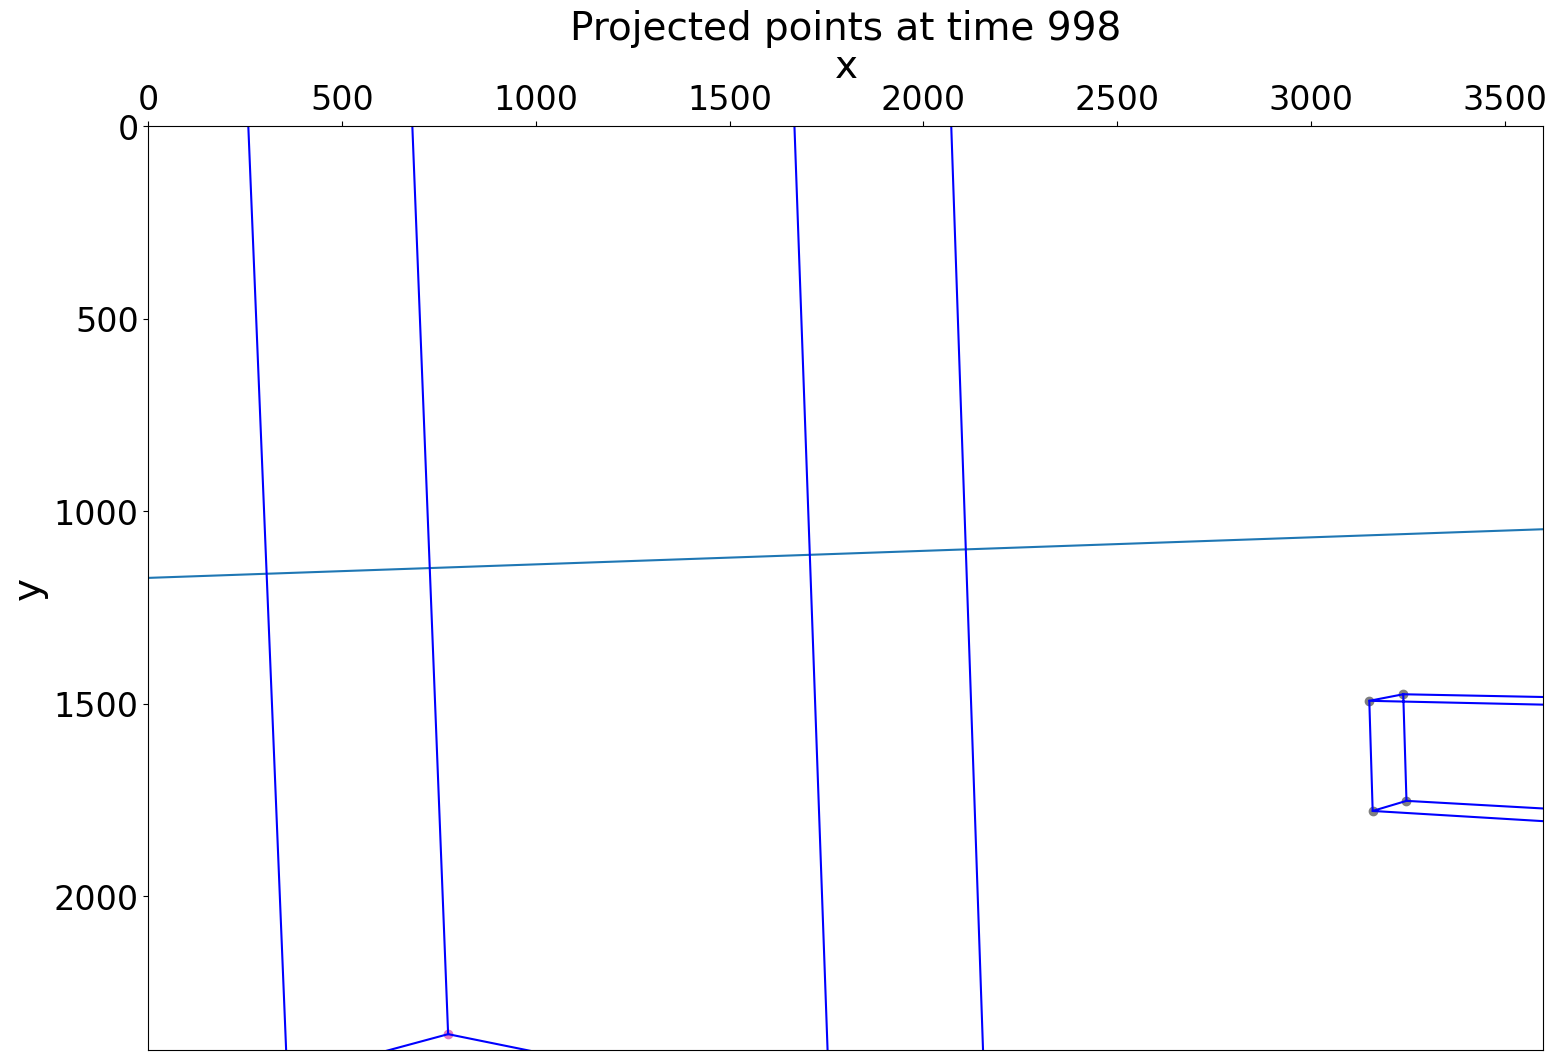

ValueError: Cannot draw a line through two identical points (x=(1800.60350410121, 1800.6094132939365), y=(1090.9268166925813, 1090.9254346333005))

<Figure size 1800x1200 with 1 Axes>

In [10]:
# Visualize from json files
if VISUALIZE:
    x_y_lim = dsg.get_larges_radius() + 250
    if STATIC_LEGACY in CAMERA_TYPES:
        x_y_lim = None
    pps_paths = {cameraID: os.path.join(simulation_folder, f'projectedPoints_C{cameraID}.json') for cameraID in cameras.keys()}
    annots_paths = {cameraID: os.path.join(simulation_folder, f'annotations_C{cameraID}.json') for cameraID in cameras.keys()}
    detections_paths = {cameraID: os.path.join(simulation_folder, f'detections_C{cameraID}.json') for cameraID in cameras.keys()}
    image_bounds = {cameraID: camera_rig.cameras[cameraID].image_bounds for cameraID in cameras.keys()}
    cameraIDs = list(cameras.keys())

    #visualize_dynamic_scene_mov(vessels, folder_path=simulation_folder)
    #visualize_camera_pose_in_dsg_mov(camera_rig, vessels, folder_path=simulation_folder, y_x_lim=x_y_lim)
    #visualize_projections_json_mov(pps_path, camera_rig.camera.image_bounds, camera_rig.horizon, folder_path=simulation_folder, display_when_min_vessels=MIN_NUM_VESSELS)
    visualize_projections_multiple_cameras(cameraIDs, pps_paths, image_bounds, camera_rig.horizon, folder_path=simulation_folder, display_when_min_vessels=MIN_NUM_VESSELS)
    #visualize_annotations_json(annots_path, camera_rig.camera.image_bounds, horizon=camera_rig.horizon, folder_path=simulation_folder, display_when_min_vessels=MIN_NUM_VESSELS)
    visualize_annotations_multiple_cameras(cameraIDs, annots_paths, image_bounds, horizons=camera_rig.horizon, folder_path=simulation_folder, display_when_min_vessels=MIN_NUM_VESSELS)
    #visualize_detections_json(detections_path, camera_rig.cameras[0].image_bounds, horizon=camera_rig.horizon[0], show_annotations=True, annotations_path=annots_path, folder_path=simulation_folder, display_when_min_vessels=MIN_NUM_VESSELS)
    visualize_detections_multiple_cameras(cameraIDs, detections_paths, image_bounds, horizons=camera_rig.horizon, show_annotations=True, annotations_paths=annots_paths, folder_path=simulation_folder, display_when_min_vessels=MIN_NUM_VESSELS)

In [ ]:
annots_paths

{0: './simulations/10/annotations_C0.json',
 1: './simulations/10/annotations_C1.json',
 2: './simulations/10/annotations_C2.json'}